# Independent Study Jun 2023

### Computer Vision

[Kaggle Learn - Computer Vision](https://www.kaggle.com/learn/computer-vision)

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

def readJpeg(filePath, size):
        return tf.image.resize(tf.io.decode_jpeg(tf.io.read_file(filePath), channels=1), size=size)

class display():
    def __init__(self):
        self.images = [readJpeg('moon.jpg', [1080, 1080]), 
                  readJpeg('car_illus.jpg', [400, 400]),
                  readJpeg('lucasLogo.jpg', [800, 800]),
                  ]
        
        plt.figure(figsize=(24, 6*len(self.images)))
        for i, image in enumerate(self.images):
            plt.subplot(len(self.images), 4, 4*i+1)
            plt.title('original')
            plt.axis('off')
            plt.imshow(tf.squeeze(image).numpy(), cmap='gray')
            self.images[i] = tf.expand_dims(tf.image.convert_image_dtype(image, dtype=tf.float32), axis=0)
    
    def show(self, image, plotIndex, title):
        plt.subplot(len(self.images), 4, plotIndex)
        plt.title(title)
        plt.axis('off')
        plt.imshow(tf.squeeze(image))
         

![kernel](2D_Convolution_Animation.gif "segment")

In [15]:

kernelNames = ['edgeDetect', 'bottomSobel', 'emboss', 'sharpen']
kernels = [
    tf.constant([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]),
    tf.constant([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]),
    tf.constant([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ]),
    tf.constant([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
]

for i, kernel in enumerate(kernels):
        kernels[i] = tf.cast(tf.reshape(kernel, [*kernel.shape, 1, 1]), dtype=tf.float32)

['edgeDetect', 'bottomSobel', 'emboss', 'sharpen']
edgeDetect selected


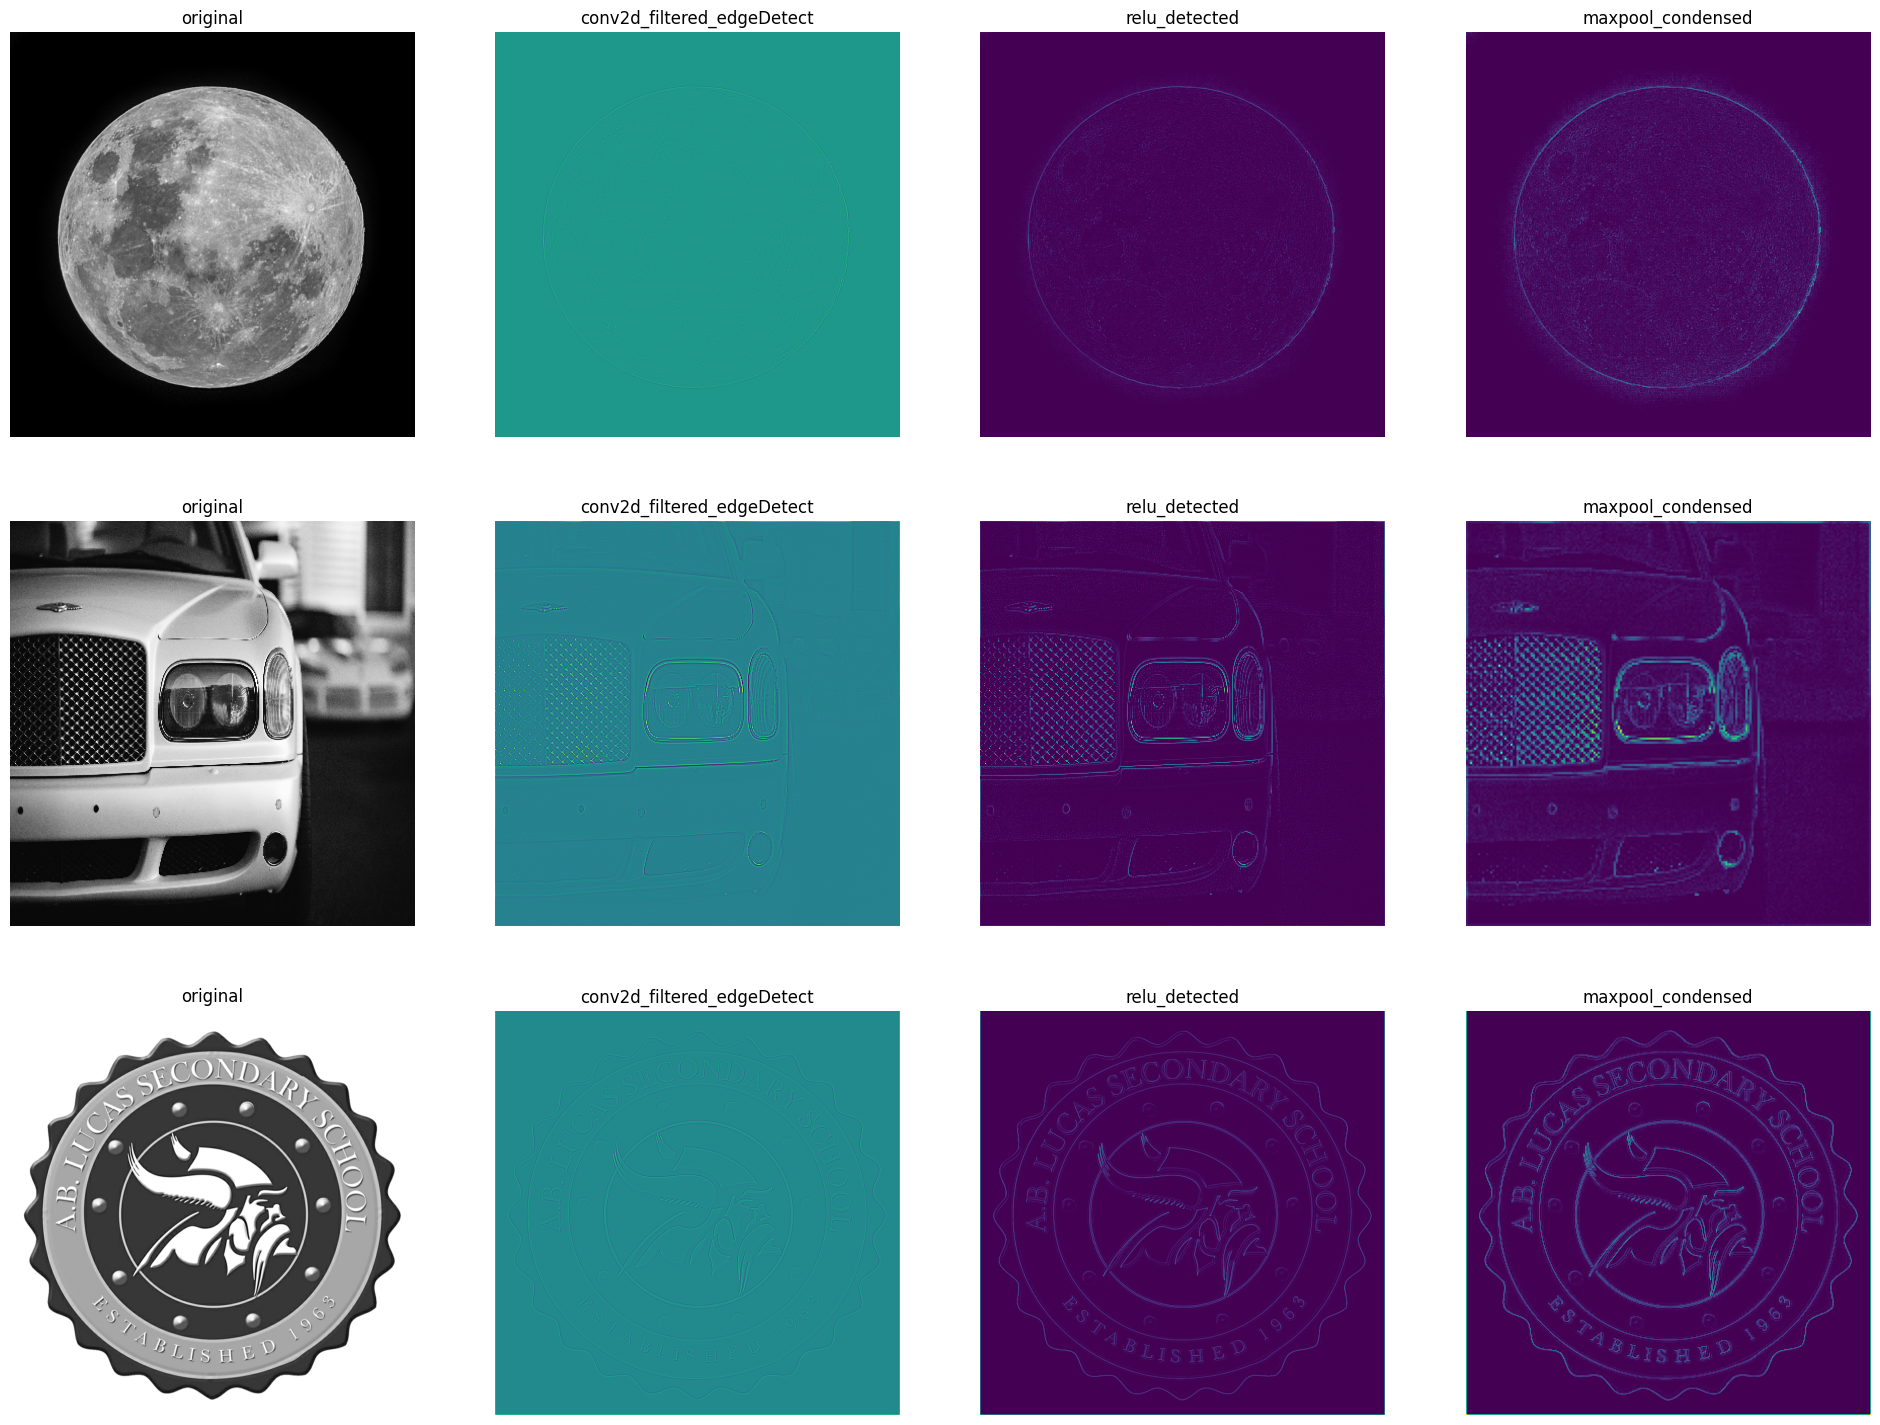

In [16]:
plot = display()

print(kernelNames)
kernel = int(input('choose your kernel for conv2d'))
print(kernelNames[kernel], 'selected')

for i, image in enumerate(plot.images):
    filtered = tf.nn.conv2d(
        input=image,
        filters=kernels[kernel],
        strides=1,
        padding='SAME',
    )
    plot.show(filtered, 4*i+2, 'conv2d_filtered_'+kernelNames[kernel])
    
    detected = tf.nn.relu(filtered)
    plot.show(detected, 4*i+3, 'relu_detected')

    condensed = tf.nn.pool(
        input=detected,
        window_shape=(2, 2),
        pooling_type='MAX',
        strides=(2, 2),
        padding='SAME'
    )
    plot.show(condensed, 4*i+4, 'maxpool_condensed')


plt.show()